In [270]:
# ========================
# 1. CARGA Y PREPROCESAMIENTO
# ========================

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt  

In [271]:
path_base="Data\\Extraidos\\"
#path_base+"duracion_asignatura.csv"

In [272]:
# 1.1 Cargar archivos CSV (separador ; y utf-8 encoding)
df_duracion = pd.read_csv(path_base+"duracion_asignatura.csv", sep=";", encoding="utf-8")
df_plan = pd.read_csv(path_base+"plan_estudios.csv", sep=";", encoding="utf-8")
df_sum_horario = pd.read_csv(path_base+"sum_horario_programado2025I.csv", sep=";", encoding="utf-8")
df_docentes_minimos = pd.read_csv(path_base+"docentes_minimos.csv", sep=";", encoding="utf-8")
df_disponibilidad = pd.read_csv(path_base+"disponibilidad_docentes_simulada.csv", encoding="utf-8")


In [273]:
print(df_disponibilidad[['HoraInicio', 'HoraFin']].dtypes)

HoraInicio    object
HoraFin       object
dtype: object


In [274]:
# 1.2 Revisar columnas clave y renombrar si es necesario
df_duracion.rename(columns=lambda x: x.strip(), inplace=True)
df_plan.rename(columns=lambda x: x.strip(), inplace=True)
df_sum_horario.rename(columns=lambda x: x.strip(), inplace=True)
df_docentes_minimos.rename(columns=lambda x: x.strip(), inplace=True)
df_disponibilidad.rename(columns=lambda x: x.strip(), inplace=True)

In [275]:
df_disponibilidad[['HoraInicio', 'HoraFin']].head()

HoraInicio HoraFin
0      15:00   20:00
1      19:00   22:00
2      13:00   18:00
3      17:00   21:00
4      16:00   20:00

In [276]:
# 1.3 Asegurar tipos de datos
for df in [df_duracion, df_plan, df_sum_horario, df_docentes_minimos, df_disponibilidad]:
    df.columns = df.columns.str.strip()

df_disponibilidad['HoraInicio'] = pd.to_datetime(df_disponibilidad['HoraInicio']).dt.time
df_disponibilidad['HoraFin'] = pd.to_datetime(df_disponibilidad['HoraFin']).dt.time

C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\2992218328.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_disponibilidad['HoraInicio'] = pd.to_datetime(df_disponibilidad['HoraInicio']).dt.time
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\2992218328.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_disponibilidad['HoraFin'] = pd.to_datetime(df_disponibilidad['HoraFin']).dt.time


In [277]:
df_disponibilidad[['HoraInicio', 'HoraFin']].head()

HoraInicio   HoraFin
0   15:00:00  20:00:00
1   19:00:00  22:00:00
2   13:00:00  18:00:00
3   17:00:00  21:00:00
4   16:00:00  20:00:00

In [278]:
df_disponibilidad['HoraInicio'] = pd.to_datetime(df_disponibilidad['HoraInicio'], format="%H:%M:%S")
df_disponibilidad['HoraFin'] = pd.to_datetime(df_disponibilidad['HoraFin'], format="%H:%M:%S")


In [279]:
df_disponibilidad[['HoraInicio', 'HoraFin']].head()

HoraInicio             HoraFin
0 1900-01-01 15:00:00 1900-01-01 20:00:00
1 1900-01-01 19:00:00 1900-01-01 22:00:00
2 1900-01-01 13:00:00 1900-01-01 18:00:00
3 1900-01-01 17:00:00 1900-01-01 21:00:00
4 1900-01-01 16:00:00 1900-01-01 20:00:00

In [280]:
print(df_disponibilidad[['HoraInicio', 'HoraFin']].dtypes)

HoraInicio    datetime64[ns]
HoraFin       datetime64[ns]
dtype: object


In [281]:
print(df_disponibilidad[['HoraInicio', 'HoraFin']].dtypes)

HoraInicio    datetime64[ns]
HoraFin       datetime64[ns]
dtype: object


In [282]:
# 1.4 Unificar claves: CodAsignatura, CodDocente
for df in [df_duracion, df_plan, df_docentes_minimos]:
    if 'CodAsignatura' in df.columns:
        df['CodAsignatura'] = df['CodAsignatura'].astype(str).str.strip()

if 'CodDocente' in df_sum_horario.columns:
    df_sum_horario['CodDocente'] = df_sum_horario['CodDocente'].astype(str).str.strip()

if 'CodAsignatura' in df_disponibilidad.columns:
    df_disponibilidad['CodAsignatura'] = df_disponibilidad['CodAsignatura'].astype(str).str.strip()

In [283]:
# 1.5 Vista previa de los datasets
print("Duración de asignaturas:", df_duracion.shape)
print("Plan de estudios:", df_plan.shape)
print("Resumen horario programado:", df_sum_horario.shape)
print("Docentes mínimos:", df_docentes_minimos.shape)
print("Disponibilidad docente simulada:", df_disponibilidad.shape)

Duración de asignaturas: (63, 4)
Plan de estudios: (89, 6)
Resumen horario programado: (224, 12)
Docentes mínimos: (63, 6)
Disponibilidad docente simulada: (73, 7)


In [284]:
df_duracion.head()

NomAsignatura  DuracionHoras  Ciclo CodAsignatura
0                           ALGORÍTMICA I            5.0      3      202W0301
1                             ESTADÍSTICA            5.0      3      202W0302
2                      FISICA ELÉCTRONICA            4.0      3      202W0303
3                    INGENIERÍA ECONÓMICA            4.0      3      202W0304
4  INTRODUCCIÓN AL DESARROLLO DE SOFTWARE            4.0      3      202W0305

In [285]:
df_plan.head()

Ciclo  Créditos CodAsignatura  \
0      1       2.0        INE002   
1      1       2.0        INE013   
2      1       3.0        INO101   
3      1       2.0        INO102   
4      1       2.0        INO103   

                                     NomAsignatura Cod Pre-Requisito  \
0                       PROGRAMACIÓN Y COMPUTACIÓN               NaN   
1                      EMPRENDIMIENTO E INNOVACIÓN               NaN   
2  REDACCIÓN Y TÉCNICAS DE COMUNICACIÓN EFECTIVA I               NaN   
3                 MÉTODOS DE ESTUDIO UNIVERSITARIO               NaN   
4                  DESARROLLO PERSONAL Y LIDERAZGO               NaN   

  Nom Pre-Requisito  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [286]:
df_sum_horario.head()

CodAsignatura               NomAsignatura  Créditos CodDocente  \
0        INE002  PROGRAMACIÓN Y COMPUTACIÓN       2.0     0A0182   
1        INE002  PROGRAMACIÓN Y COMPUTACIÓN       2.0     0A0182   
2        INE002  PROGRAMACIÓN Y COMPUTACIÓN       2.0   07240690   
3        INE002  PROGRAMACIÓN Y COMPUTACIÓN       2.0   07240690   
4        INE002  PROGRAMACIÓN Y COMPUTACIÓN       2.0     085774   

                 NomDocente  Sección Aula        Día HoraInicio HoraFin  Tope  \
0  RUIZ RIVERA, MARIA ELENA        2  211    VIERNES      14:00   15:00     4   
1  RUIZ RIVERA, MARIA ELENA        2  211    VIERNES      15:00   17:00     4   
2   DAMASO RIOS, MARIA ROSA        3  211     MARTES      10:00   11:00     4   
3   DAMASO RIOS, MARIA ROSA        3  211     MARTES      11:00   13:00     4   
4   VERA POMALAZA, VIRGINIA        5  211  MIERCOLES      10:00   11:00     4   

   Matriculados  
0             2  
1             2  
2             3  
3             3  
4             1

In [287]:
df_docentes_minimos.head()

CodAsignatura                           NomAsignatura  Matriculados  \
0      202W0301                           ALGORÍTMICA I            10   
1      202W0302                             ESTADÍSTICA             5   
2      202W0303                      FISICA ELÉCTRONICA             6   
3      202W0304                    INGENIERÍA ECONÓMICA             2   
4      202W0305  INTRODUCCIÓN AL DESARROLLO DE SOFTWARE             4   

   DuracionHoras  NumGrupos  HorasTotales  
0            5.0          1           5.0  
1            5.0          1           5.0  
2            4.0          1           4.0  
3            4.0          1           4.0  
4            4.0          1           4.0

In [288]:
df_disponibilidad.head()

CodDocente CodAsignatura      Día          HoraInicio             HoraFin  \
0    Z000000      202W0301  VIERNES 1900-01-01 15:00:00 1900-01-01 20:00:00   
1    Z000001      202W0301  VIERNES 1900-01-01 19:00:00 1900-01-01 22:00:00   
2    Z000002      202W0302  VIERNES 1900-01-01 13:00:00 1900-01-01 18:00:00   
3    Z000003      202W0303  VIERNES 1900-01-01 17:00:00 1900-01-01 21:00:00   
4    Z000004      202W0304   JUEVES 1900-01-01 16:00:00 1900-01-01 20:00:00   

   DuracionHoras  Ciclo  
0            5.0      3  
1            3.0      3  
2            5.0      3  
3            4.0      3  
4            4.0      3

In [289]:
def generar_individuo():
    individuo = []
    franjas_ocupadas = set()  # (CodDocente, Dia, HoraInicio, HoraFin)

    for _, fila in df_docentes_minimos.iterrows():
        cod_asig = fila['CodAsignatura']
        secciones_necesarias = int(fila['Secciones']) if 'Secciones' in fila else 1
        duracion = df_duracion[df_duracion['CodAsignatura'] == cod_asig]['DuracionHoras'].values[0]

        posibles_disponibilidades = df_disponibilidad[df_disponibilidad['CodAsignatura'] == cod_asig]
        disponibles_por_docente = posibles_disponibilidades.groupby('CodDocente')

        candidatos = []
        for docente, sesiones in disponibles_por_docente:
            total_minutos = sum(
                hora_a_minutos(hf.strftime("%H:%M")) - hora_a_minutos(hi.strftime("%H:%M"))
                for hi, hf in zip(sesiones['HoraInicio'], sesiones['HoraFin'])
            )
            if total_minutos >= duracion * 60:
                candidatos.append(docente)

        seccion_actual = 1  # Empezar desde la primera sección

        for _ in range(secciones_necesarias):
            sesiones_asignadas = []
            acumulado = 0
            sesiones_usadas = set()

            if candidatos:
                docente = random.choice(candidatos)
                sesiones_docente = posibles_disponibilidades[posibles_disponibilidades['CodDocente'] == docente]
                sesiones_docente = sesiones_docente.sample(frac=1)

                for _, sesion in sesiones_docente.iterrows():
                    dia = sesion['Día']
                    hi_str = sesion['HoraInicio'].strftime("%H:%M")
                    hf_str = sesion['HoraFin'].strftime("%H:%M")

                    sesion_id = (docente, cod_asig, seccion_actual, dia, hi_str, hf_str)
                    franja = (docente, dia, hi_str, hf_str)

                    if sesion_id in sesiones_usadas or franja in franjas_ocupadas:
                        continue

                    hi = hora_a_minutos(hi_str)
                    hf = hora_a_minutos(hf_str)
                    dur = (hf - hi) / 60

                    if acumulado + dur <= duracion:
                        sesiones_asignadas.append({
                            "CodDocente": docente,
                            "CodAsignatura": cod_asig,
                            "Sección": seccion_actual,
                            "Dia": dia,
                            "HoraInicio": hi_str,
                            "HoraFin": hf_str,
                            "NomDocente": "DOCENTE_" + docente[-4:],
                            "NomAsignatura": df_duracion[df_duracion['CodAsignatura'] == cod_asig]['NomAsignatura'].values[0],
                            "Tope": 30
                        })
                        acumulado += dur
                        sesiones_usadas.add(sesion_id)
                        franjas_ocupadas.add(franja)

                    if acumulado >= duracion:
                        break

            # Si no se completó con docente real, se asignan sesiones simuladas
            if acumulado < duracion:
                sim_cod = f"SIM_{random.randint(1000, 9999)}"
                ciclo = obtener_ciclo(cod_asig)
                acumulado = 0
                sesiones_asignadas_simuladas = []

                while acumulado < duracion:
                    if ciclo <= 5:
                        hi = random.choice(range(480, 1021, 30))  # entre 08:00 y 17:00
                        max_hf = min(hi + 120, 1080)  # 120 min máximo
                    else:
                        hi = random.choice(range(1080, 1261, 30))  # entre 18:00 y 21:00
                        max_hf = min(hi + 90, 1320)  # 90 min máximo

                    duracion_sesion = min(duracion - acumulado, (max_hf - hi) / 60)
                    hf = hi + int(duracion_sesion * 60)

                    hi_str = f"{hi//60:02}:{hi%60:02}"
                    hf_str = f"{hf//60:02}:{hf%60:02}"
                    dia = random.choice(['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES'])

                    # Evitar franjas ocupadas
                    if (sim_cod, dia, hi_str, hf_str) in franjas_ocupadas:
                        continue

                    sesiones_asignadas_simuladas.append({
                        "CodDocente": sim_cod,
                        "CodAsignatura": cod_asig,
                        "Sección": seccion_actual,
                        "Dia": dia,
                        "HoraInicio": hi_str,
                        "HoraFin": hf_str,
                        "NomDocente": "DOCENTE_SIMULADO",
                        "NomAsignatura": df_duracion[df_duracion['CodAsignatura'] == cod_asig]['NomAsignatura'].values[0],
                        "Tope": 30
                    })
                    acumulado += duracion_sesion
                    franjas_ocupadas.add((sim_cod, dia, hi_str, hf_str))

                # Verificar que las horas acumuladas sumen lo esperado
                if round(acumulado, 1) >= duracion:
                    sesiones_asignadas.extend(sesiones_asignadas_simuladas)
                else:
                    print(f"[⚠️] No se pudo completar sección {seccion_actual} con simulado")

            # ✅ Solo agregar las sesiones si se cumple con la duración
            if round(acumulado, 1) >= duracion:
                individuo.extend(sesiones_asignadas)
                seccion_actual += 1  # Avanzar a la siguiente sección
            else:
                print(f"[⚠️] Sección {seccion_actual} de {cod_asig} no pudo completarse correctamente")

    return individuo


In [290]:
# ========================
# 3. VISUALIZACIÓN RESUMEN (a ejecutar tras la evolución)
# ========================

def graficar_penalizaciones(penalizaciones_por_generacion):
    tipos_penalizacion = set()
    for gen in penalizaciones_por_generacion:
        tipos_penalizacion.update(gen.keys())
    tipos_penalizacion = sorted(list(tipos_penalizacion))

    evolucion = {tipo: [] for tipo in tipos_penalizacion}
    for gen in penalizaciones_por_generacion:
        for tipo in tipos_penalizacion:
            evolucion[tipo].append(gen.get(tipo, 0))

    plt.figure(figsize=(12, 6))
    for tipo in tipos_penalizacion:
        plt.plot(evolucion[tipo], label=tipo)

    plt.title("Evolución de Penalizaciones por Tipo")
    plt.xlabel("Generación")
    plt.ylabel("Puntaje de Penalización")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [291]:
# ========================
# 4. FUNCIÓN DE CRUCE
# ========================

def cruzar(padre1, padre2):
    punto = len(padre1) // 2
    hijo = padre1[:punto] + padre2[punto:]
    return hijo

In [292]:

# ========================
# 5. MUTACIÓN
# ========================

def mutar(individuo, prob=0.2):
    nuevo = []
    for sesion in individuo:
        if random.random() < prob:
            cod = sesion['CodAsignatura']
            docente = sesion['CodDocente']

            opciones = df_disponibilidad[
                (df_disponibilidad['CodAsignatura'] == cod) &
                (df_disponibilidad['CodDocente'] == docente)
            ]

            if not opciones.empty:
                fila = opciones.sample(1).iloc[0]
                nueva_sesion = sesion.copy()
                nueva_sesion['Día'] = fila['Día']
                nueva_sesion['HoraInicio'] = fila['HoraInicio'].strftime('%H:%M')
                nueva_sesion['HoraFin'] = fila['HoraFin'].strftime('%H:%M')
                nuevo.append(nueva_sesion)
            else:
                # Simula un docente nuevo con horario aleatorio
                dia_random = random.choice(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado'])
                inicio = random.randint(8, 20) * 60  # entre 08:00 y 20:00
                duracion = random.choice([60, 90, 120])  # Duración en minutos
                fin = inicio + duracion
                if fin > 1320:
                    fin = 1320  # No más allá de las 22:00

                nueva_sesion = sesion.copy()
                nueva_sesion['Día'] = dia_random
                nueva_sesion['HoraInicio'] = f"{inicio // 60:02}:{inicio % 60:02}"
                nueva_sesion['HoraFin'] = f"{fin // 60:02}:{fin % 60:02}"
                nueva_sesion['CodDocente'] = "SIM_" + str(random.randint(1000, 9999))
                nueva_sesion['NomDocente'] = "DOCENTE_SIMULADO"

                nuevo.append(nueva_sesion)
        else:
            nuevo.append(sesion)
    return nuevo




In [293]:
# ========================
# 6. FUNCIÓN DE EVOLUCIÓN
# ========================

def evolucionar(poblacion, generaciones=20):
    mejor = None
    penalizaciones_por_generacion = []

    for _ in range(generaciones):
        nueva_poblacion = []
        for _ in range(len(poblacion)):
            p1, p2 = random.sample(poblacion, 2)
            hijo = cruzar(p1, p2)
            mutado = mutar(hijo)
            nueva_poblacion.append(mutado)

        poblacion = nueva_poblacion

        mejor_gen = min(poblacion, key=lambda ind: evaluar_individuo(ind)[0])
        if mejor is None or evaluar_individuo(mejor_gen)[0] < evaluar_individuo(mejor)[0]:
            mejor = mejor_gen

        _, detalle = evaluar_individuo(mejor_gen)
        penalizaciones_por_generacion.append(detalle)

    return mejor, penalizaciones_por_generacion


In [294]:

# ========================
# 7. BÚSQUEDA TABÚ
# ========================

def generar_vecindario(individuo, tamaño=10):
    vecinos = []
    for _ in range(tamaño):
        vecino = mutar(individuo.copy(), prob=0.2)
        vecinos.append(vecino)
    return vecinos

def busqueda_tabu(solucion_inicial, iteraciones=30, tamaño_lista=10):
    mejor_solucion = solucion_inicial
    mejor_fitness = evaluar_individuo(solucion_inicial)
    lista_tabu = []

    actual = solucion_inicial

    for i in range(iteraciones):
        vecindario = generar_vecindario(actual)
        vecindario = [v for v in vecindario if v not in lista_tabu]

        if not vecindario:
            break

        mejor_vecino = min(vecindario, key=lambda ind: evaluar_individuo(ind)[0])
        fitness_vecino = evaluar_individuo(mejor_vecino)

        if fitness_vecino < mejor_fitness:
            mejor_solucion = mejor_vecino
            mejor_fitness = fitness_vecino

        lista_tabu.append(mejor_vecino)
        if len(lista_tabu) > tamaño_lista:
            lista_tabu.pop(0)

        actual = mejor_vecino
        print(f"[Tabú] Iteración {i+1} - Mejor fitness: {mejor_fitness}")

    return mejor_solucion


In [295]:

# ========================
# 8. EJECUCIÓN
# ========================

poblacion = [generar_individuo() for _ in range(20)]
mejor_solucion, penalizaciones_por_generacion = evolucionar(poblacion)



C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

In [296]:
mejor_solucion

[{'CodDocente': 'Z000000',
  'CodAsignatura': '202W0301',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '15:00',
  'HoraFin': '20:00',
  'NomDocente': 'DOCENTE_0000',
  'NomAsignatura': 'ALGORÍTMICA I',
  'Tope': 30},
 {'CodDocente': 'Z000002',
  'CodAsignatura': '202W0302',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '13:00',
  'HoraFin': '18:00',
  'NomDocente': 'DOCENTE_0002',
  'NomAsignatura': 'ESTADÍSTICA',
  'Tope': 30},
 {'CodDocente': 'Z000003',
  'CodAsignatura': '202W0303',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '17:00',
  'HoraFin': '21:00',
  'NomDocente': 'DOCENTE_0003',
  'NomAsignatura': 'FISICA ELÉCTRONICA',
  'Tope': 30},
 {'CodDocente': 'Z000004',
  'CodAsignatura': '202W0304',
  'Sección': 1,
  'Dia': 'JUEVES',
  'HoraInicio': '16:00',
  'HoraFin': '20:00',
  'NomDocente': 'DOCENTE_0004',
  'NomAsignatura': 'INGENIERÍA ECONÓMICA',
  'Tope': 30,
  'Día': 'JUEVES'},
 {'CodDocente': 'Z000005',
  'CodAsignatura': '202W0305',
  'Sección': 1,
  

In [297]:
penalizaciones_por_generacion

[{'fuera_horario': 4500.0,
  'docente_simulado': 48000.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 500.0},
 {'fuera_horario': 4500.0,
  'docente_simulado': 48000.0,
  'traslape_mismo_ciclo': 200.0,
  'franjas_excedidas': 200.0,
  'duracion_incorrecta': 500.0},
 {'fuera_horario': 4800.0,
  'docente_simulado': 48000.0,
  'traslape_mismo_ciclo': 200.0,
  'franjas_excedidas': 200.0,
  'duracion_incorrecta': 500.0},
 {'fuera_horario': 5400.0,
  'docente_simulado': 48000.0,
  'duracion_incorrecta': 1500.0},
 {'fuera_horario': 6000.0,
  'docente_simulado': 48000.0,
  'duracion_incorrecta': 1500.0},
 {'fuera_horario': 6600.0,
  'docente_simulado': 48000.0,
  'traslape_mismo_ciclo': 100.0,
  'duracion_incorrecta': 1500.0},
 {'fuera_horario': 6600.0,
  'docente_simulado': 48000.0,
  'duracion_incorrecta': 2000.0},
 {'fuera_horario': 6900.0,
  'docente_simulado': 48000.0,
  'duracion_incorrecta': 1500.0},
 {'fuera_horario': 6600.0,
  'docente_simulado': 48000.0,
  'duracion_incor

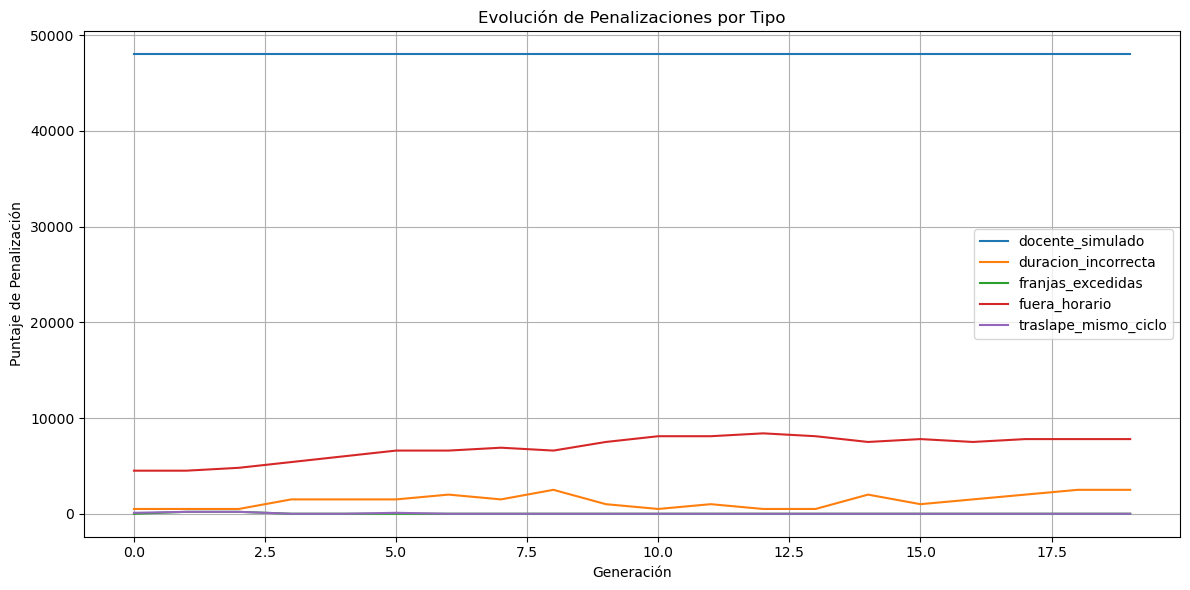

In [298]:
graficar_penalizaciones(penalizaciones_por_generacion)

In [299]:
mejor_refinada = busqueda_tabu(mejor_solucion)
print("\nMejor solución refinada con búsqueda tabú (primeras 5 sesiones):")
print(mejor_refinada[:5])


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 1 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 2 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 3 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 4 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 5 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 6 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 7 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 8 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 9 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 10 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 11 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 12 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 13 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 14 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 15 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 16 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 17 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 18 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 19 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 20 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 21 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 22 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 23 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 24 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 25 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 26 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 27 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 28 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 29 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})


C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

[Tabú] Iteración 30 - Mejor fitness: (53100.0, {'fuera_horario': 4500.0, 'docente_simulado': 48000.0, 'traslape_mismo_ciclo': 100.0, 'duracion_incorrecta': 500.0})

Mejor solución refinada con búsqueda tabú (primeras 5 sesiones):
[{'CodDocente': 'Z000000', 'CodAsignatura': '202W0301', 'Sección': 1, 'Dia': 'VIERNES', 'HoraInicio': '15:00', 'HoraFin': '20:00', 'NomDocente': 'DOCENTE_0000', 'NomAsignatura': 'ALGORÍTMICA I', 'Tope': 30}, {'CodDocente': 'Z000002', 'CodAsignatura': '202W0302', 'Sección': 1, 'Dia': 'VIERNES', 'HoraInicio': '13:00', 'HoraFin': '18:00', 'NomDocente': 'DOCENTE_0002', 'NomAsignatura': 'ESTADÍSTICA', 'Tope': 30}, {'CodDocente': 'Z000003', 'CodAsignatura': '202W0303', 'Sección': 1, 'Dia': 'VIERNES', 'HoraInicio': '17:00', 'HoraFin': '21:00', 'NomDocente': 'DOCENTE_0003', 'NomAsignatura': 'FISICA ELÉCTRONICA', 'Tope': 30}, {'CodDocente': 'Z000004', 'CodAsignatura': '202W0304', 'Sección': 1, 'Dia': 'JUEVES', 'HoraInicio': '16:00', 'HoraFin': '20:00', 'NomDocente': 'D

C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disponible = disponible[
C:\Users\nicol\AppData\Local\Temp\ipykernel_13676\4208996586.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

In [300]:
mejor_refinada

[{'CodDocente': 'Z000000',
  'CodAsignatura': '202W0301',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '15:00',
  'HoraFin': '20:00',
  'NomDocente': 'DOCENTE_0000',
  'NomAsignatura': 'ALGORÍTMICA I',
  'Tope': 30},
 {'CodDocente': 'Z000002',
  'CodAsignatura': '202W0302',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '13:00',
  'HoraFin': '18:00',
  'NomDocente': 'DOCENTE_0002',
  'NomAsignatura': 'ESTADÍSTICA',
  'Tope': 30},
 {'CodDocente': 'Z000003',
  'CodAsignatura': '202W0303',
  'Sección': 1,
  'Dia': 'VIERNES',
  'HoraInicio': '17:00',
  'HoraFin': '21:00',
  'NomDocente': 'DOCENTE_0003',
  'NomAsignatura': 'FISICA ELÉCTRONICA',
  'Tope': 30},
 {'CodDocente': 'Z000004',
  'CodAsignatura': '202W0304',
  'Sección': 1,
  'Dia': 'JUEVES',
  'HoraInicio': '16:00',
  'HoraFin': '20:00',
  'NomDocente': 'DOCENTE_0004',
  'NomAsignatura': 'INGENIERÍA ECONÓMICA',
  'Tope': 30,
  'Día': 'JUEVES'},
 {'CodDocente': 'Z000005',
  'CodAsignatura': '202W0305',
  'Sección': 1,
  

In [301]:
# ========================
# 8. EXPORTACIÓN DEL HORARIO
# ========================

def exportar_horario(individuo, nombre_archivo="horario_resultado.csv"):
    columnas = ["CodAsignatura", "NomAsignatura", "CodDocente", "NomDocente",
                "Sección", "Dia", "HoraInicio", "HoraFin", "Tope"]
    
    # Verifica que cada sesión tenga las claves necesarias
    sesiones_validas = []
    for i, sesion in enumerate(individuo):
        if not isinstance(sesion, dict):
            print(f"[Advertencia] Sesión {i} no es un diccionario:", sesion)
            continue
        faltantes = set(columnas) - set(sesion.keys())
        if faltantes:
            print(f"[Advertencia] Sesión {i} tiene campos faltantes: {faltantes}")
            continue
        sesiones_validas.append(sesion)

    # Crear DataFrame y exportar
    df_final = pd.DataFrame(sesiones_validas, columns=columnas)

    print("\nVista previa del horario final exportado:")
    print(df_final.head())

    df_final.to_csv(nombre_archivo, index=False, sep=";", encoding="utf-8")
    print(f"\n✅ Horario exportado correctamente como {nombre_archivo}")
    return df_final


In [302]:
# 8. EXPORTACIÓN
df_exportado = exportar_horario(mejor_refinada)


Vista previa del horario final exportado:
  CodAsignatura                           NomAsignatura CodDocente  \
0      202W0301                           ALGORÍTMICA I    Z000000   
1      202W0302                             ESTADÍSTICA    Z000002   
2      202W0303                      FISICA ELÉCTRONICA    Z000003   
3      202W0304                    INGENIERÍA ECONÓMICA    Z000004   
4      202W0305  INTRODUCCIÓN AL DESARROLLO DE SOFTWARE    Z000005   

     NomDocente  Sección      Dia HoraInicio HoraFin  Tope  
0  DOCENTE_0000        1  VIERNES      15:00   20:00    30  
1  DOCENTE_0002        1  VIERNES      13:00   18:00    30  
2  DOCENTE_0003        1  VIERNES      17:00   21:00    30  
3  DOCENTE_0004        1   JUEVES      16:00   20:00    30  
4  DOCENTE_0005        1   MARTES      11:00   15:00    30  

✅ Horario exportado correctamente como horario_resultado.csv
